In [1]:
import os
DIRECTORY_PATH = '/'
os.chdir(DIRECTORY_PATH)

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import optuna
from catboost import CatBoostClassifier, Pool
from matplotlib.ticker import FuncFormatter

from rankers.cat_boost_classifier_ranker.config import CONFIG

/Users/j.fidalgo/PycharmProjects/joao_example_2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sns.set()

# Load dataset

In [4]:
df_train = pd.read_pickle(CONFIG["df_user_movie_features_train_path"])
df_test = pd.read_pickle(CONFIG["df_user_movie_features_test_path"])

# Explore Dataset

In [5]:
df_train

,user_id,movie_id,timestamp,has_seen_movie,user_avg_rating,user_avg_year,user_total_movie_count,user_movie_percent_(no genres listed),user_movie_percent_Action,user_movie_percent_Adventure,...,movie_Film-Noir,movie_Horror,movie_IMAX,movie_Musical,movie_Mystery,movie_Romance,movie_Sci-Fi,movie_Thriller,movie_War,movie_Western
0,429,22,828124615,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,1,0,0,1,0,0
1,429,150,828124615,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
2,429,161,828124615,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
3,429,165,828124615,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,429,217,828124615,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161343,495,122882,1458634764,1,4.403846,2008.230769,26.0,0.0,0.384615,0.230769,...,0,0,0,0,0,0,1,1,0,0
161344,495,2161,1458634866,0,4.407407,2008.481481,27.0,0.0,0.407407,0.259259,...,0,0,0,0,0,0,0,0,0,0
161345,495,2959,1458634866,1,4.407407,2008.481481,27.0,0.0,0.407407,0.259259,...,0,0,0,0,0,0,0,1,0,0
161346,495,4849,1458635162,0,4.428571,2008.142857,28.0,0.0,0.428571,0.250000,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test

,user_id,movie_id,timestamp,has_seen_movie,user_avg_rating,user_avg_year,user_total_movie_count,user_movie_percent_(no genres listed),user_movie_percent_Action,user_movie_percent_Adventure,...,movie_Film-Noir,movie_Horror,movie_IMAX,movie_Musical,movie_Mystery,movie_Romance,movie_Sci-Fi,movie_Thriller,movie_War,movie_Western
0,495,8933,1458635171,0,4.448276,2008.275862,29.0,0.000000,0.448276,0.241379,...,0,0,0,0,0,0,0,0,0,0
1,495,72998,1458635171,1,4.448276,2008.275862,29.0,0.000000,0.448276,0.241379,...,0,0,1,0,0,0,1,0,0,0
2,495,2762,1458635237,1,4.466667,2008.300000,30.0,0.000000,0.466667,0.266667,...,0,1,0,0,1,0,0,0,0,0
3,495,7248,1458635237,0,4.466667,2008.300000,30.0,0.000000,0.466667,0.266667,...,0,0,0,0,0,0,0,0,1,0
4,495,434,1458635247,0,4.467742,2008.000000,31.0,0.000000,0.451613,0.258065,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40343,514,166203,1537757040,0,3.315990,1991.000000,394.0,0.005076,0.243655,0.190355,...,0,0,0,0,0,0,1,0,0,0
40344,514,1322,1537757059,0,3.313924,1990.964467,395.0,0.005063,0.245570,0.189873,...,0,1,0,0,0,0,0,0,0,0
40345,514,5246,1537757059,1,3.313924,1990.964467,395.0,0.005063,0.245570,0.189873,...,0,0,0,0,0,0,0,0,0,0
40346,514,162,1537799250,1,3.309343,1990.936709,396.0,0.005051,0.247475,0.189394,...,0,0,0,0,0,0,0,0,0,0


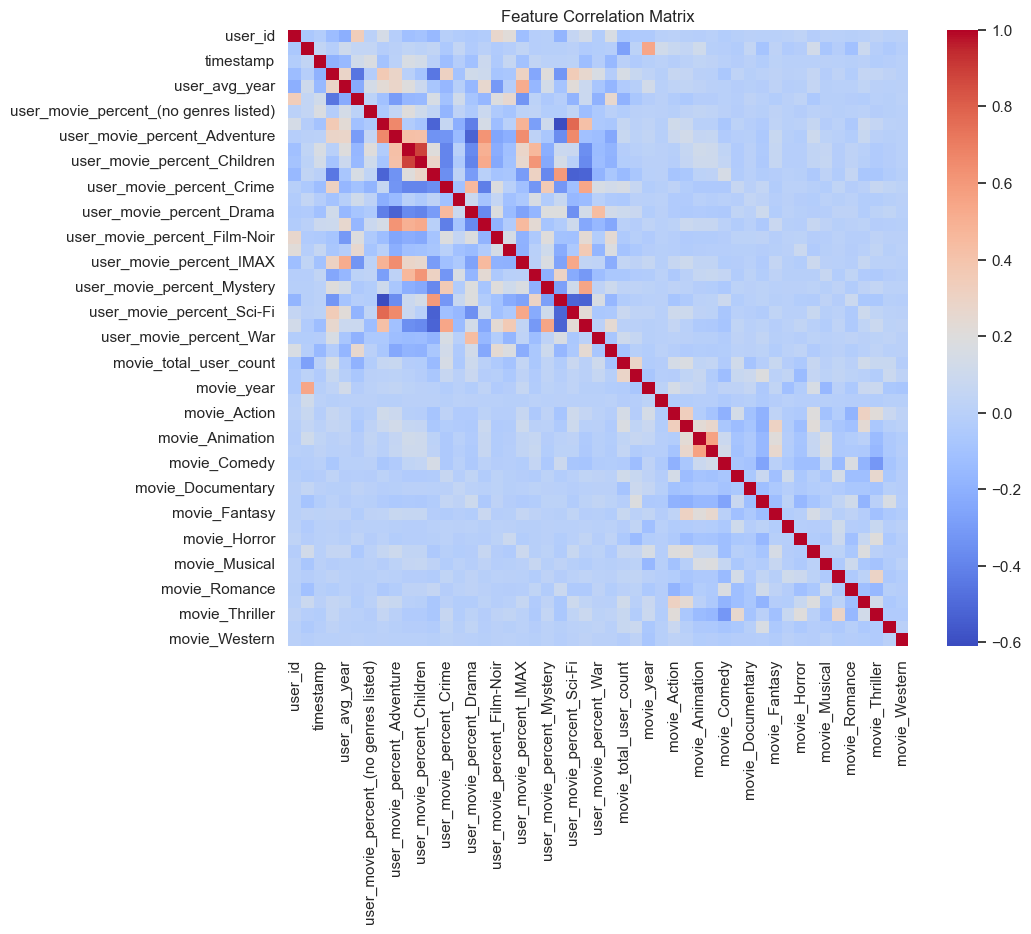

In [7]:
# Calculate the correlation matrix
correlation_matrix = df_test.drop('has_seen_movie', axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Feature Correlation Matrix')
plt.show()

# X_train, X_test, y_train, y_test

In [8]:
target = CONFIG['target']
cat_features = CONFIG['cat_features']

features = df_train.drop(target, axis=1).columns.to_list()

# make sure df are sorted by timestamp when TimeSeriesSplit is used
df_train = df_train.sort_values(['timestamp', 'user_id', 'movie_id']).reset_index(drop=True)
df_test = df_test.sort_values(['timestamp', 'user_id', 'movie_id']).reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = df_train[features], df_test[features], df_train[target], df_test[target]

# Hyperparameter Tuning

In [9]:
# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    iterations = trial.suggest_int("iterations", 100, 500, step=25)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5, log=True)
    depth = trial.suggest_int("depth", 4, 14, step=2)
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 0.0, 8.0, step=0.05)
    subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.05)

    # Initialize CatBoostClassifier with suggested parameters
    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        subsample=subsample,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False
    )

    # Time-aware cross-validation
    tscv = TimeSeriesSplit(n_splits=3)
    scores = []

    for train_index, test_index in tscv.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Provide a validation set to monitor during training
        model.fit(X_train_fold, y_train_fold, cat_features=cat_features, 
                  eval_set=[(X_test_fold, y_test_fold)], 
                  verbose=False)
        
        # Access the AUC from the best score of the model
        best_auc = model.get_best_score()['validation']['AUC']

        scores.append(best_auc)

    # Return mean accuracy across folds
    return np.mean(scores)

In [ ]:
# Create an Optuna study
study = optuna.create_study(direction="maximize")  # Maximizing accuracy
study.optimize(objective, n_trials=50)

# Print best parameters
print("Best parameters:", study.best_params)
print("Best test accuracy:", study.best_value)

[I 2025-03-19 13:35:27,341] A new study created in memory with name: no-name-aa821962-4e1b-4b4f-bb0c-5d03e989be7d


In [ ]:
# Train final model with best params
best_params = study.best_params
best_params["loss_function"] = "Logloss"
best_params["eval_metric"] = "AUC"

best_params

In [ ]:
# Extract trials data
df_trials = study.trials_dataframe()
df_trials = df_trials.sort_values("value")  # Sort by AUC (ascending, best last)

# Define the formatter function to convert y-axis values to percentages
def to_percent(y, position):
    return f'{y * 100:.0f}%'

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(len(df_trials)), df_trials["value"], label="AUC over Trials")
# Add baseline (random classifier AUC)
plt.axhline(y=0.5, color='black', linestyle='--', label="Baseline (AUC = 0.5)")
plt.ylim(0, 1)
plt.xlim(0, len(df_trials) - 1)
plt.xlabel("Trial Number (Sorted)")
plt.ylabel("Test AUC")
plt.title("Optuna Trials: Test AUC from Worst to Best")
plt.legend()
# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.show()

In [ ]:
import optuna.visualization as vis

# Plot hyperparameter importance
fig = vis.plot_param_importances(study)
fig.show()

In [ ]:
fig = vis.plot_slice(study)
fig.show()

# Train Model with Best Hyperparameters

In [ ]:
catboost_model = CatBoostClassifier(**best_params)

# Train on full dataset
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

catboost_model.fit(train_pool, eval_set=test_pool, plot=False, early_stopping_rounds=50)

In [ ]:
# Get feature importance
feature_importance = catboost_model.get_feature_importance(train_pool)

feature_importance_percent = feature_importance / feature_importance.sum() * 100

# Sort features by importance
sorted_idx_feature_importance = feature_importance.argsort()

feature_names = list(X_train.columns)

In [ ]:
# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx_feature_importance)), feature_importance_percent[sorted_idx_feature_importance], align='center')
plt.yticks(range(len(sorted_idx_feature_importance)), [feature_names[i] for i in sorted_idx_feature_importance])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (% of total)')

# Format x-axis labels as percentages
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

plt.show()

In [ ]:
# Extract Logloss values from CatBoost's training logs
train_log_loss = catboost_model.get_evals_result()["learn"]['Logloss']
test_log_loss = catboost_model.get_evals_result()["validation"]['Logloss']

# create baseline
base_line_log_loss = -np.log(0.5) # log loss for random binary classification

# Define the formatter function to convert y-axis values to percentages
def to_percent(y, position):
    return f'{y * 100:.0f}%'

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_log_loss, label="Train log_loss", color="blue")
plt.plot(test_log_loss, label="Test log_loss", color="red")
plt.axhline(y=base_line_log_loss, color='black', linestyle='--', label="Baseline (log_loss = -np.log(0.5))")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.xlim(0, len(test_log_loss) - 1)
plt.ylim(0, 1)


plt.title("Train vs. Test log_loss Over Epochs")
plt.legend()
plt.show()

In [ ]:
# Access eval results
eval_results = catboost_model.get_evals_result()

# Get AUC values for validation (this is tracked by default)
validation_auc = eval_results["validation"]['AUC']  # AUC for validation set

# Plot AUC for both training and validation
plt.figure(figsize=(10, 5))
plt.plot(validation_auc, label="Validation AUC", color="blue")
# Add baseline (random classifier AUC)
plt.axhline(y=0.5, color='black', linestyle='--', label="Baseline (AUC = 0.5)")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.xlim(0, len(validation_auc) - 1)
plt.ylim(0, 1)
plt.title("Validation AUC Over Epochs")
plt.legend()
# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()